Теперь построим множество A

In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import monte_carlo_experiment

In [ ]:
#Фиксируем параметры процедуры построения графа
D = 0.1             # параметр d для dist графа
n_sampels = 500     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'dist'  # тип графа 


In [3]:
params_h0 = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': D,
            'lambda': 1,
            'distribution': 'h0'
         }

params_h1 = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': D,
            'lambda': 1/np.sqrt(10),
            'distribution': 'h1'
         }

In [4]:

metrics_h0 = monte_carlo_experiment(params_h0, n_sampels, False)

metrics_h1 = monte_carlo_experiment(params_h1, n_sampels, False)

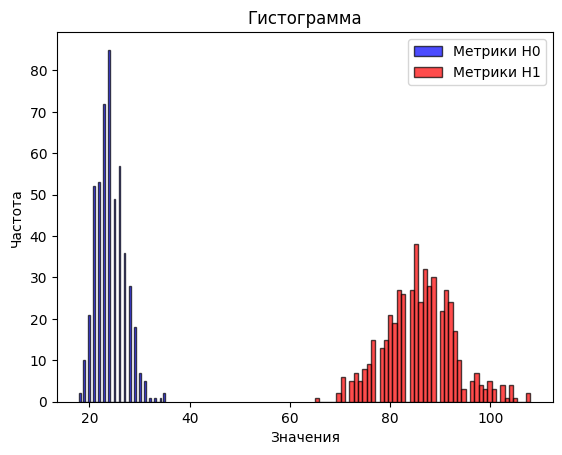

In [10]:
plt.hist(metrics_h0, bins=50, alpha=0.7, color='blue', edgecolor='black', label='Метрики H0')
plt.hist(metrics_h1, bins=50, alpha=0.7, color='red', edgecolor='black',  label='Метрики H1')
plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

Как мы видим, при фиксированном N значения очень хорошо отличаются.
Построим область A так, что левее ее левой границы лежит не более 5% результатов

In [35]:
A_crit = np.percentile(metrics_h0, 100 * (0.95))
print(A_crit)

29.0


Итого для N=200 область A от 0 до 29. (На самомо деле видно, что можно взять A от 0 до 50 и результат будет лучше)


In [ ]:
def error_calculation(A_crit, n_sampels):  # функция вычисляет ошибку и мощность H1
    rejections=0
    approved=0
    h0_data = monte_carlo_experiment(params_h0, n_sampels, False) 
    for i in h0_data:
        if i>A_crit: # данные из распределения H0, но отнесли к H1
            rejections+=1
    err = rejections/n_sampels

    h1_data = monte_carlo_experiment(params_h1, n_sampels, False)
    for i in h1_data:
        if i>A_crit: # Данные из H1 и отнесли к H1
            approved+=1
            
    power = approved/n_sampels

    return err, power
    




In [34]:
results = error_calculation(A_crit, 100)

print(f'Ошибка на H0: {results[0]}', f'Полнота H1: {results[1]}')

Ошибка на H0: 0.04 Полнота H1: 1.0


Как мы видим, число принятых неверно значений из H0 не больше 0.05, из H1 все выборки были угаданы верно